In [1]:
import folium

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
import pandas as pd

In [5]:
plt.rc('axes', unicode_minus=False)

In [67]:
plt.rc('font', family = 'Malgun Gothic')
plt.rc('axes', unicode_minus = False)
%matplotlib inline

In [65]:
%config InlineBackend.figure_format = 'retina'

In [63]:
df = pd.read_csv("data/상가(상권)정보_의료기관_201909.csv", low_memory=False)
df.shape

(91335, 39)

In [13]:
df_senior=df[df["상권업종소분류명"]=="노인/치매병원"].copy()

<Axes: xlabel='시도명'>

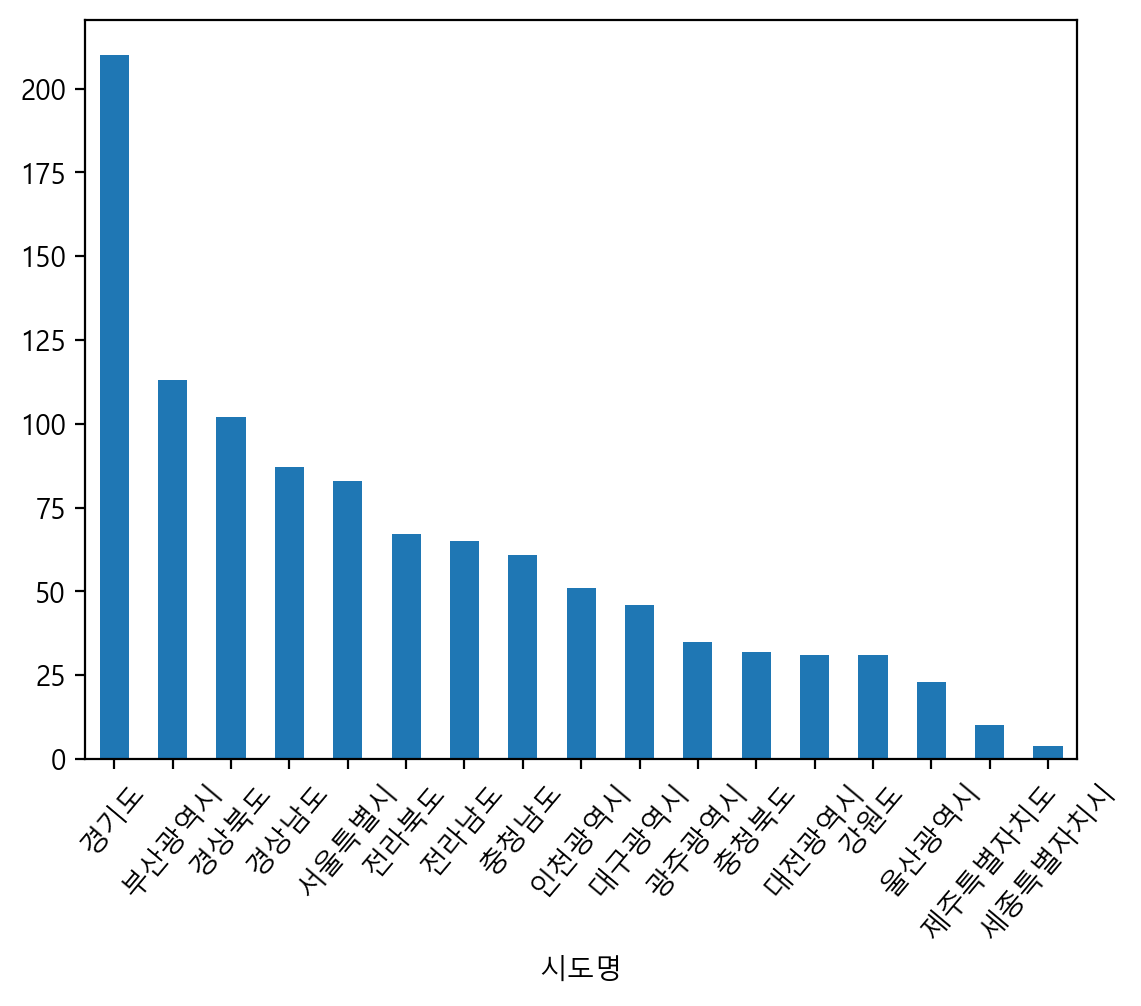

In [15]:
df_senior["시도명"].value_counts().plot.bar(rot=50)

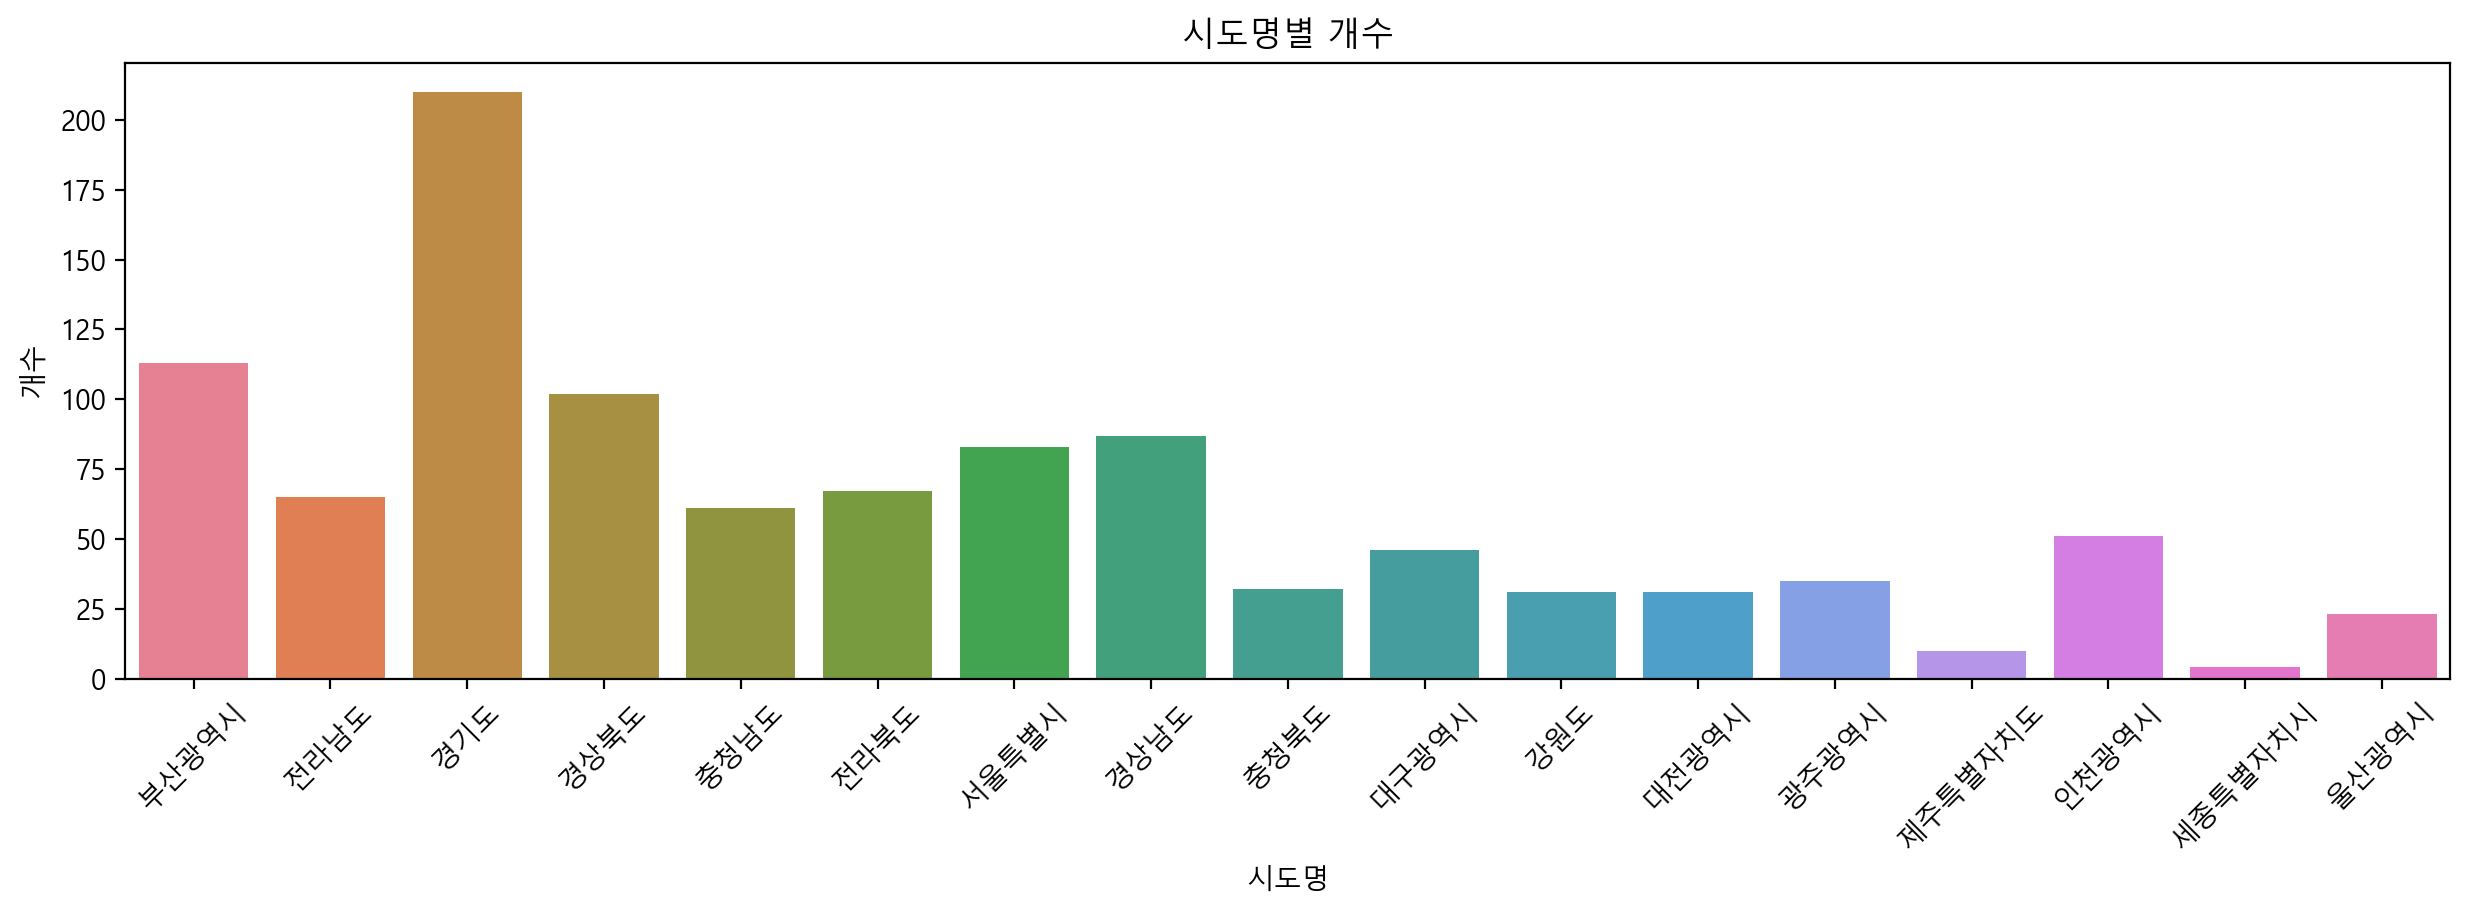

In [75]:
# plt.figure(figsize=(15,4))
# sns.countplot(data=df_senior,x="시도명")

plt.figure(figsize=(15, 4))

# hue 파라미터를 사용하여 각 시도명에 대해 색상 구분
ax = sns.countplot(data=df_senior, x="시도명", hue="시도명", palette="husl")
ax.legend_.remove()

plt.title('시도명별 개수')
plt.xlabel('시도명')
plt.ylabel('개수')
plt.xticks(rotation=45)  # x축 레이블이 길 경우 회전
#plt.legend(title='시도명')  # 범례 추가
plt.show()

In [87]:
print(df_senior["위도"].mean())
print(df_senior["경도"].mean())

36.322638410225366
127.69216156637984


In [21]:
folium.map

<module 'folium.map' from 'C:\\Users\\whwnq\\anaconda3\\Lib\\site-packages\\folium\\map.py'>

In [29]:
df_senior.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
21,21128898,다사랑요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2632010300101360002000001,다사랑요양병원,부산광역시 북구 덕천로 339,616110.0,46610.0,NaN,1,NaN,129.040773,35.209154


In [61]:
map = folium.Map(location=[df_senior["위도"].mean(), df_senior["경도"].mean()], zoom_start=1)

for n in df_senior.index:
    name = df_senior.loc[n, "상호명"]
    address = df_senior.loc[n, "도로명주소"]
    popup = f"{name}-{address}"
    location = [df_senior.loc[n, "위도"], df_senior.loc[n, "경도"]]
    folium.Marker(
        location = location,
        popup = popup,
    ).add_to(map)
map

In [85]:
# #folium.Choropleth(
#     geo_data=df_senior,
#     name="choropleth",
#     data=df_senior,
#     columns=["시도명", "노인/치매병원"],
#     key_on="feature.id",
#     fill_color="YlGn",
#     fill_opacity=0.7,
#     line_opacity=0.2,
#     legend_name="전국 노인/치매병원 분포 (%)",
# ).add_to(m)

# folium.LayerControl().add_to(m)

# m